# 서울 지하철 승/하차 이용객 예측 시스템

- 데이터 불러오기

In [24]:
import pandas as pd
import numpy as np

In [25]:
metro_df=pd.read_csv('../../data/metro_pd_new.csv', encoding='euc-kr', index_col=0)

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_23792\2229594466.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  metro_df=pd.read_csv('../../data/metro_pd_new.csv', encoding='euc-kr', index_col=0)


In [26]:
metro_df.head(5)

,수송일자,역명,호선,고유역번호(외부역코드),승하차구분,weekend,time,passenger
0,2022-01-01,서울역,1.0,150,승차,주말,5,120.0
1,2022-01-01,서울역,1.0,150,승차,주말,6,137.0
2,2022-01-01,서울역,1.0,150,승차,주말,7,211.0
3,2022-01-01,서울역,1.0,150,승차,주말,8,439.0
4,2022-01-01,서울역,1.0,150,승차,주말,9,592.0


- 칼럼명 변경

In [27]:
metro_df.rename(columns=({'수송일자':'date',
                              '고유역번호(외부역코드)':'code',
                              '역명':'station',
                              '승하차구분':'in_out',
                              '호선':'line'     
                               }),inplace=True)

In [28]:
metro_df.head(3)

,date,station,line,code,in_out,weekend,time,passenger
0,2022-01-01,서울역,1.0,150,승차,주말,5,120.0
1,2022-01-01,서울역,1.0,150,승차,주말,6,137.0
2,2022-01-01,서울역,1.0,150,승차,주말,7,211.0


- 코드 딕셔너리 만들기

In [29]:
code_df=metro_df[['station','line','code']]
code_df.drop_duplicates(inplace=True)

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_23792\221702897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  code_df.drop_duplicates(inplace=True)


In [30]:
code_list=code_df['code'].unique()
code_list=list(code_list)

In [31]:
code_dict={}

In [32]:
for i in code_list:
   code_dict[((code_df[code_df['code']==i]['station'].values[0]),(int(code_df[code_df['code']==i]['line'].values[0])))]=i

In [33]:
code_dict

{('서울역', 1): '150',
 ('시청', 1): '151',
 ('종각', 1): '152',
 ('종로3가', 1): '153',
 ('종로5가', 1): '154',
 ('동대문', 1): '155',
 ('신설동', 1): '156',
 ('제기동', 1): '157',
 ('청량리(서울시립대입구)', 1): '158',
 ('동묘앞', 1): '159',
 ('시청', 2): '201',
 ('을지로입구', 2): '202',
 ('을지로3가', 2): '203',
 ('을지로4가', 2): '204',
 ('동대문역사문화공원(DDP)', 2): '205',
 ('신당', 2): '206',
 ('상왕십리', 2): '207',
 ('왕십리(성동구청)', 2): '208',
 ('한양대', 2): '209',
 ('뚝섬', 2): '210',
 ('성수', 2): '211',
 ('건대입구', 2): '212',
 ('구의(광진구청)', 2): '213',
 ('강변(동서울터미널)', 2): '214',
 ('잠실나루', 2): '215',
 ('잠실(송파구청)', 2): '216',
 ('잠실새내', 2): '217',
 ('종합운동장', 2): '218',
 ('삼성(무역센터)', 2): '219',
 ('선릉', 2): '220',
 ('역삼', 2): '221',
 ('강남', 2): '222',
 ('교대(법원.검찰청)', 2): '223',
 ('서초', 2): '224',
 ('방배', 2): '225',
 ('사당', 2): '226',
 ('낙성대(강감찬)', 2): '227',
 ('서울대입구(관악구청)', 2): '228',
 ('봉천', 2): '229',
 ('신림', 2): '230',
 ('신대방', 2): '231',
 ('구로디지털단지', 2): '232',
 ('대림(구로구청)', 2): '233',
 ('신도림', 2): '234',
 ('문래', 2): '235',
 ('영등포구청', 2): '236',
 (

- station_dict 만들기(key값과 value값을 스위칭)

In [34]:
station_dict={v:k for k,v in code_dict.items()}

- 데이터 입력 받기

In [36]:
station_name=input('이용하실 역 명을 입력하세요: ')
line=input('이용하시는 호선을 입력하세요: ')
time=input('이용하실 시간을 입력하세요: ')
in_out=input('승차/하차를 입력해주세요: ')
week=input('평일/주말을 입력해주세요: ')

- 코드 딕셔너리를 이용한 code 입력

In [39]:
data_code=int(code_dict[(station_name,int(line))])

- 인코딩

    -  피처 칼럼 추출

In [40]:
matro_pd_new_use = metro_df[['code','in_out','weekend','passenger','time']]

    - OneHotEncoder로 인코딩(피처는 승/하차, 평일/주말, 시간)

In [41]:
df_dummies=pd.get_dummies(matro_pd_new_use, columns = ['in_out','weekend','time'])

    - 역 별 개별 모델링을 위한 코드 별 데이터 추출

In [42]:
groups = df_dummies.groupby(df_dummies.code)

In [43]:
select_data=groups.get_group(data_code)

In [45]:
select_data.head(5)

,code,passenger,in_out_승차,in_out_하차,weekend_주말,weekend_평일,time_5,time_6,time_7,time_8,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
798,212,205.0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
799,212,251.0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
800,212,362.0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
801,212,578.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
802,212,805.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 머신러닝 모델링

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np

- 독립변수와 종속변수 설정

In [47]:
x=select_data.iloc[:,2:]
y=select_data['passenger']

- 데이터 분리

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, train_size=0.8)

- 선형회귀분석

In [52]:
metro_modeling = LinearRegression()
metro_modeling.fit(x_train, y_train)

LinearRegression()

In [53]:
y_predict = metro_modeling.predict(x_test)

In [54]:
y_train_predict = metro_modeling.predict(x_train)

    - 선형회귀분석의 트레이닝 데이터의 RMSE

In [58]:
LR_train_RMSE=np.sqrt(mean_squared_error(y_train, y_train_predict))

    - 선형회귀분석의 테스트 데이터의 RMSE

In [60]:
LR_test_RMSE=np.sqrt(mean_squared_error(y_test, y_predict))

    - 선형회귀분석의 테스트 데이터의 RMSLE

In [61]:
LR_test_RMSLE=np.sqrt(mean_squared_log_error(y_test, y_predict))

- 의사결정나무

In [62]:
metro_tree_moedel = DecisionTreeRegressor()
metro_tree_moedel.fit(x_train, y_train)
y_tree_predict = metro_tree_moedel.predict(x_test)

In [63]:
y_train_tree_predict = metro_tree_moedel.predict(x_train)

    -의사결정나무의 트레이닝 데이터의 RMSE

In [64]:
tree_train_RMSE=np.sqrt(mean_squared_error(y_train, y_train_tree_predict))

    - 의사결정나무의 테스트 데이터의 RMSE

In [65]:
tree_test_RMSE=np.sqrt(mean_squared_error(y_test, y_tree_predict))

    - 의사결정나무의 테스트 데이터의 RMSLE

In [66]:
tree_test_RMSLE=np.sqrt(mean_squared_log_error(y_test, y_tree_predict))

- 랜덤포레스트

In [67]:
random_F_model = RandomForestRegressor()
random_F_model.fit(x_train, y_train)
metro_random_F_predicted = random_F_model.predict(x_test)

In [68]:
metro_random_F_train_predicted = random_F_model.predict(x_train)

    -랜덤포레스트의 트레이닝 데이터의 RMSE

In [69]:
RF_train_RMSE=np.sqrt(mean_squared_error(y_train, metro_random_F_train_predicted))

    - 랜덤포레스트의 테스트 데이터의 RMSE

In [70]:
RF_test_RMSE=np.sqrt(mean_squared_error(y_test, metro_random_F_predicted))

    - 랜덤포레스트의 테스트 데이터의 RMSLE

In [71]:
RF_test_RMSLE=np.sqrt(mean_squared_log_error(y_test, metro_random_F_predicted))

- SVR(Support Vector Regression)

In [72]:
svr_model=SVR(C=40, kernel='poly',degree=80)
svr_model.fit(x_train, y_train)
svr_predicted = svr_model.predict(x_test)

In [74]:
svr_train_predicted = svr_model.predict(x_train)

    - SVR의 트레이닝 데이터의 RMSE

In [75]:
SVR_train_RMSE=np.sqrt(mean_squared_error(y_train, svr_train_predicted))

    - SVR의 테스트 데이터의 RMSE

In [76]:
SVR_test_RMSE=np.sqrt(mean_squared_error(y_test, svr_predicted))

    - SVR의 테스트 데이터의 RMSLE

In [77]:
SVR_test_RMSLE=np.sqrt(mean_squared_log_error(y_test, svr_predicted))

- 결과값 출력

    - 원하는 값을 예측하기 위한 x데이터 입력

In [90]:
answer=pd.DataFrame([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [91]:
answer=answer.transpose()

In [92]:
answer.columns=['in_out_승차','in_out_하차','weekend_주말','weekend_평일','time_5','time_6','time_7','time_8','time_9','time_10','time_11','time_12','time_13','time_14','time_15','time_16','time_17','time_18','time_19','time_20','time_21','time_22','time_23']

In [93]:
answer

,in_out_승차,in_out_하차,weekend_주말,weekend_평일,time_5,time_6,time_7,time_8,time_9,time_10,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    -조건 값 추가

In [96]:
if week=='평일':
    answer['weekend_평일']=1
elif week=='주말':
    answer['weekend_주말']=1

In [97]:
if in_out=='승차':
    answer['in_out_승차']=1
elif in_out=='하차':
    answer['in_out_하차']=1

In [98]:
answer['time_'+str(time)]=1

    -의사결정나무와 랜덤포레스트의 값의 평균을 계산

In [101]:
num_of_cus=round((random_F_model.predict(answer)[0]+round(metro_tree_moedel.predict(answer)[0]))/2)

# 최종 결과 도출

In [104]:
print(f'{line}호선 {station_name}역 {time}시 {week} {in_out} 이용객 수는 {num_of_cus}명 입니다')

2호선 건대입구역 8시 평일 하차 이용객 수는 2541명 입니다


- 최종 결과의 RMSLE값

In [106]:
(tree_test_RMSLE+RF_test_RMSLE)/2

0.25766731400529985

# 최종결과의 피처 중요도 분석

In [109]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/batang.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_23792\1907488815.py:5: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


- 의사결정나무모델의 피처 중요도 평가

In [170]:
feature_series1=pd.Series(data=metro_tree_moedel.feature_importances_, index=x_train.columns)

In [172]:
feature_series1=feature_series1.sort_values(ascending=False)

Text(0.5, 1.0, '의사결정나무의 피처 중요도')

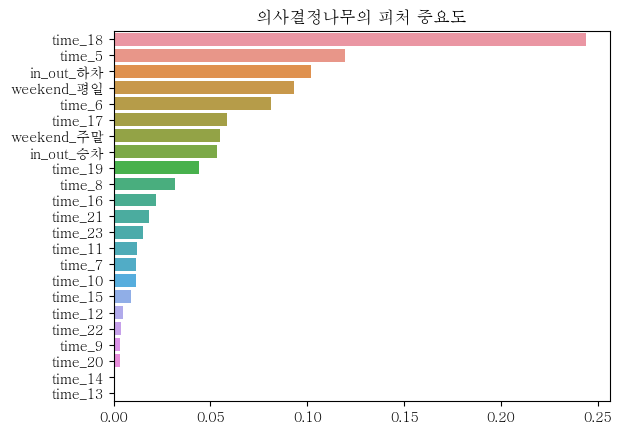

In [193]:
sns.barplot(x= feature_series1, y=feature_series1.index)
plt.title('의사결정나무의 피처 중요도')

- 랜덤포레스트의 피처 중요도 평가

In [177]:
feature_series2=pd.Series(data=random_F_model.feature_importances_, index=x_train.columns)

In [178]:
feature_series2 = feature_series2.sort_values(ascending=False)

Text(0.5, 1.0, '랜덤포레스트의 피처 중요도')

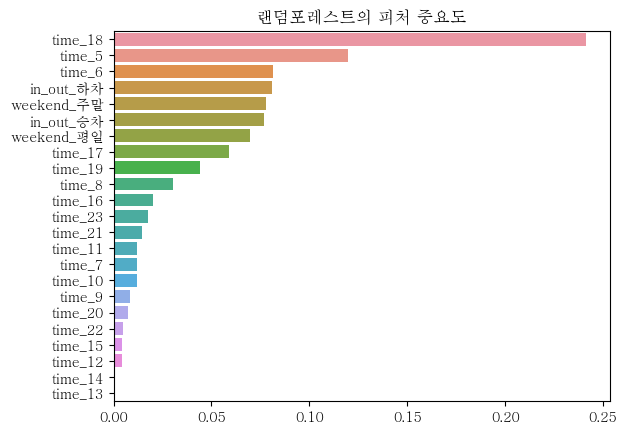

In [194]:
sns.barplot(x= feature_series2, y=feature_series2.index)
plt.title('랜덤포레스트의 피처 중요도')